# 主要内容——用数组进行数据处理
1. 向数组操作一样表示逻辑条件——np.where函数
2. 数学和统计方法
3. 布尔数组的方法——any, all
4. 排序——arr.sort()和np.sort(arr)的区别
5. 单一性和其他集合逻辑——unique()和set()的对比;in1d

# 1.向数组操作一样表示逻辑条件

numpy.where函数是要给向量版的三相表达式，x if conditin else y.  
假设我们有一个布尔型数组和两个数组

In [2]:
import numpy as np
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

如果cond为true，那么我们就去对应的xarr中的值，如果为false，就去yarr中对应值。列表表达式的写法如下：

In [3]:
result = [(x if c else y)
         for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

这么做会有很多问题。  
1. 对于很大的数组，运行会比较慢  
2. 对于多元数组不起作用  

但是，np.where能让我们写得更简洁

In [4]:
result1 = np.where(cond, xarr, yarr)
result1

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

np.where中的第二个和第三个参数不一定是数组，where在数据分析中的一个典型用法是基于一个数组产生另一个数组。比如，把一个随机数字矩阵中所有的正数变为2，负数变为-2.

In [5]:
arr = np.random.randn(4, 4)

In [6]:
arr

array([[ 1.1104011 , -1.59172693,  0.05009028,  2.26843524],
       [-0.77682575, -1.262955  , -0.1759078 ,  2.18464647],
       [ 1.34351731, -0.39252765, -0.44792347,  0.03062305],
       [ 0.28949351, -0.78628203,  1.77059252,  1.63650059]])

In [7]:
arr > 0

array([[ True, False,  True,  True],
       [False, False, False,  True],
       [ True, False, False,  True],
       [ True, False,  True,  True]], dtype=bool)

In [8]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2,  2],
       [-2, -2, -2,  2],
       [ 2, -2, -2,  2],
       [ 2, -2,  2,  2]])

也可以结合标量和数组，例如，将所有的正数变为2，负数仍然为原来的数组

In [9]:
np.where(arr > 0, 2, arr)

array([[ 2.        , -1.59172693,  2.        ,  2.        ],
       [-0.77682575, -1.262955  , -0.1759078 ,  2.        ],
       [ 2.        , -0.39252765, -0.44792347,  2.        ],
       [ 2.        , -0.78628203,  2.        ,  2.        ]])

# 2. 数学和统计方法

汇总统计(aggregate statistic)

In [11]:
arr = np.random.randn(4, 4)
arr

array([[ 0.03541412, -1.1363918 , -0.34298775, -0.81586677],
       [ 0.28024419,  0.13302283, -1.27329256, -0.45873761],
       [-0.09932839,  1.36450692,  0.43794847,  1.25386421],
       [-0.73251607, -0.7737835 , -0.7884758 ,  0.84524939]])

In [12]:
arr.mean()

-0.12944563306787657

In [13]:
arr.sum()

-2.0711301290860251

mean,sum这样的函数能接受axis作为参数来计算统计数字，返回的结果维度更少

In [16]:
arr.mean(axis = 1)
#计算各列之间的平均值

array([-0.56495805, -0.32969079,  0.7392478 , -0.36238149])

In [17]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()
# 累加

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [18]:
np.cumsum?

In [19]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [20]:
arr.cumsum(axis=0) # 沿着行加法：第一行+第二行+第三行

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [21]:
arr.cumsum(axis=1) # 沿着列加法

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

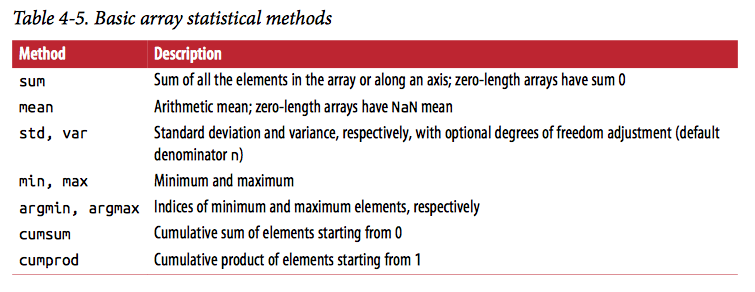

In [63]:
from IPython.display import Image
Image(filename = "3.png", width=600, height=600)

# 3.布尔数组的方法 

In [23]:
arr = np.random.randn(100)
(arr > 0).sum()

41

In [24]:
bools = np.array([False, False, True, False])

In [26]:
bools.any()
# bools中是否有一个True

True

In [28]:
bools.all()
#bools中是否 全部为True

False

# 4.排序

In [30]:
arr = np.random.randn(6)
arr

array([ 0.01153989, -0.04912798,  0.87052263, -0.44834701,  0.15386144,
        0.4636373 ])

In [32]:
arr.sort()

In [33]:
arr

array([-0.44834701, -0.04912798,  0.01153989,  0.15386144,  0.4636373 ,
        0.87052263])

如果是多维数组，还可以按照axis来排序

In [39]:
arr = np.random.randn(5, 3)
arr

array([[ 1.78947554, -1.61716778,  0.94054583],
       [-2.14489626,  0.18736871,  1.22511364],
       [ 0.02487044, -0.5517042 , -0.0986014 ],
       [-0.75692473,  0.16293232, -1.31745369],
       [ 2.35116178,  0.29645852, -0.46327794]])

In [42]:
arr.sort(1)
#按列排序：第一列、第二列、第三列相比

In [43]:
arr

array([[-1.61716778,  0.94054583,  1.78947554],
       [-2.14489626,  0.18736871,  1.22511364],
       [-0.5517042 , -0.0986014 ,  0.02487044],
       [-1.31745369, -0.75692473,  0.16293232],
       [-0.46327794,  0.29645852,  2.35116178]])

直接调用数组的sort方法会对改变原来数组的顺序，而如果使用np.sort()函数的话，会生成一个新的排序后的结果  

In [44]:
arr = np.random.randn(5)
arr

array([-1.18703355, -0.04511174, -1.61431302, -1.00450678,  0.71530043])

In [45]:
np.sort(arr)

array([-1.61431302, -1.18703355, -1.00450678, -0.04511174,  0.71530043])

In [46]:
arr

array([-1.18703355, -0.04511174, -1.61431302, -1.00450678,  0.71530043])

上述结果并未改变原来的数组

计算分位数的例子  
基本思想：先给数组排序，然后选择某个排名的值

In [47]:
arr = np.random.randn(100)
arr.sort()

In [48]:
arr[int(0.05 * len(arr))]

-1.6226774533095278

# 5. 单一性和其他集合逻辑

numpy也有一些基本集合操作作用于一维数组。np.unique能够返回排好序且不重复的值

In [50]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='<U4')

In [51]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [52]:
np.unique(ints)

array([1, 2, 3, 4])

如果用纯python代码来写的话，需要利用集合set

In [57]:
sorted(set(ints))

[1, 2, 3, 4]

np.in1d,用于判断一个数组的值是否在另一个数组里，返回一个布尔数组：

In [58]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [61]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

一些数组的集合操作有

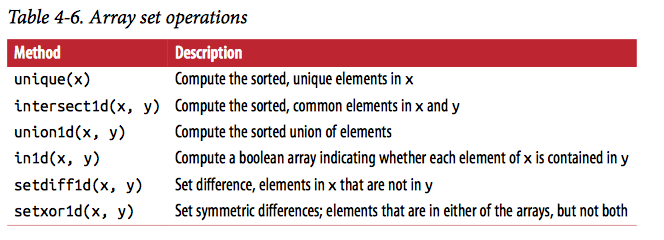

In [62]:
from IPython.display import Image
Image(filename = "4.png", width=600, height=600)